### Importar Librerias

In [125]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

## Mercado eléctrico español

In [176]:
resu = pd.read_csv('data_generacion/resumen.csv', encoding='latin1').T


In [177]:
def limpiar_dataframe(df):
    # Copiar el DataFrame para evitar modificar el original
    df_limpiado = df.copy()

    # Establecer los nombres de columna a partir de la primera fila y eliminar esa fila
    df_limpiado.columns = df_limpiado.iloc[0]
    df_limpiado = df_limpiado.drop(df_limpiado.index[0])

    # Contar los valores nulos en cada columna
    num_nulls = df_limpiado.isnull().sum()

    # Obtener las columnas con más de 10 valores nulos
    columns_to_drop = num_nulls[num_nulls > 10].index

    # Eliminar las columnas del DataFrame
    df_limpiado = df_limpiado.drop(columns_to_drop, axis=1)

    # Quitarle el título a la columna
    df_limpiado.columns.name = None

    #Seleccionar las columnas deseadas
    columnas_deseadas = ['Hidráulica',
       'Turbinación bombeo', 'Nuclear', 'Carbón',
       'Motores diésel', 'Turbina de gas', 'Turbina de vapor',
       'Ciclo combinado', 'Hidroeólica', 'Eólica', 'Solar fotovoltaica',
       'Solar térmica', 'Otras renovables', 'Cogeneración',
       'Residuos no renovables', 'Residuos renovables', 'Generación total']
    df_limpiado = df_limpiado.loc[:, columnas_deseadas]

    #Lista de columnas a modificar
    #columnas = ['Hidráulica', 'Hidroeólica', 'Eólica', 'Solar fotovoltaica', 'Solar térmica', 'Otras renovables', 'Residuos renovables']

    # Reemplazar la coma por un punto y convertir a tipo float
    for columna in columnas_deseadas:
        df_limpiado[columna] = df_limpiado[columna].str.replace(',', '.').astype(float)

    # Resetear el índice
    df_limpiado = df_limpiado.reset_index(drop=True)

    return df_limpiado


In [178]:
resu = limpiar_dataframe(resu)

# añadir columna Year



,Hidráulica,Turbinación bombeo,Nuclear,Carbón,Motores diésel,Turbina de gas,Turbina de vapor,Ciclo combinado,Hidroeólica,Eólica,Solar fotovoltaica,Solar térmica,Otras renovables,Cogeneración,Residuos no renovables,Residuos renovables,Generación total
0,11.394,1.019,20.784,1.917,0.968,0.163,0.426,17.115,0.009,23.278,8.069,1.810,1.815,10.034,0.861,0.338,100.0
1,6.478,1.366,20.254,2.809,0.922,0.238,0.437,24.651,0.008,22.138,10.094,1.492,1.685,6.423,0.687,0.318,100.0
2,10.031,2.162,20.524,1.450,0.836,0.253,0.456,14.633,0.007,25.832,13.025,1.633,1.394,7.036,0.447,0.281,100.0


In [180]:
hihi

NameError: name 'hihi' is not defined

### Cargar el archivo 

Precio de la luz por días desde 1 Enero de 2014 hasta 27 de Mayo de 2023

- Value: €/Mwh
- URL: https://www.esios.ree.es/es/analisis/600?geoids=3&vis=1&start_date=01-01-2014T00%3A00&end_date=30-05-2023T23%3A55&compare_start_date=31-12-2013&groupby=day&zoom=5&latlng=36.13787471840729%2C-6.921386718749999

Incremento del precio de la Electricidad

La guerra en Ucrania no es el culpable del aumento desorbitado del precio de la electricidad. En el caso de la electricidad, el incremento de precios se podría haber evitado más fácilmente tan solo cambiando el sistema de fijación de precios.

El sistema actualmente utilizado, denominado marginalista, a través de una subasta diaria, hace que todo el suministro se pague al precio de la fuente de electricidad más cara (tradicionalmente lo eran el carbón y el gas, y ahora únicamente el gas) . Y eso hace que todo el sistema se encarezca mucho por los problemas del gas y su alto precio, que en realidad solo proporciona una pequeña parte de la electricidad total consumida.

Se ha llegado a pagar a más 500 euros el MW/hora a empresas eólicas e hidráulicas que tienen un coste de generación que no tienen absolutamente nada que ver. 

Muchos expertos ven necesaria una profunda revisión del mercado eléctrico, para evitar los problemas de funcionamiento del sistema marginalista. Estos expertos opinan que el sector eléctrico debería orientarse al bienestar social cambiando las reglas de funcionamiento para obedezcan a criterios sociales, aunque sin cambiar la tecnología.

In [ ]:
nombre_archivo = 'data_mw/days_2014-2023.csv'

data = []

with open(nombre_archivo, 'r') as archivo_csv:
    lector_csv = csv.reader(archivo_csv, delimiter=';')
    encabezado = next(lector_csv)
    
    for fila in lector_csv:
        data.append(fila)
        
df = pd.DataFrame(data, columns=encabezado)

df.columns


Index(['id', 'name', 'geoid', 'geoname', 'value', 'datetime'], dtype='object')

Eliminar columnas innecesarias

In [ ]:
columnas_a_eliminar = ['name', 'geoid', 'geoname','id']
df = df.drop(columnas_a_eliminar, axis=1)

# Transformo la columna value a float

df['value'] = df['value'].astype(float)

# Convertir la columna 'datetime' al tipo de dato datetime
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)
df['mes'] = df['datetime'].dt.month
df['dia'] = df['datetime'].dt.day
df['week'] = df['datetime'].dt.isocalendar().week
df['year'] = df['datetime'].dt.year
df['date'] = df['datetime'].dt.date
df['weekend'] = df['datetime'].dt.weekday ## la idea es transformarla para pillar findes



### Gestionar columna Datetime

Datetime contiene las fechas y horas en formato ISO 8601

In [ ]:
def weekend(x):
    if x in [5,6]:
        return 1
    else:
        return 0

In [ ]:
df['weekend'] = df['weekend'].apply(weekend)
df[df['weekend']==1];



In [ ]:
df[df['weekend']==1];

Representación de datos

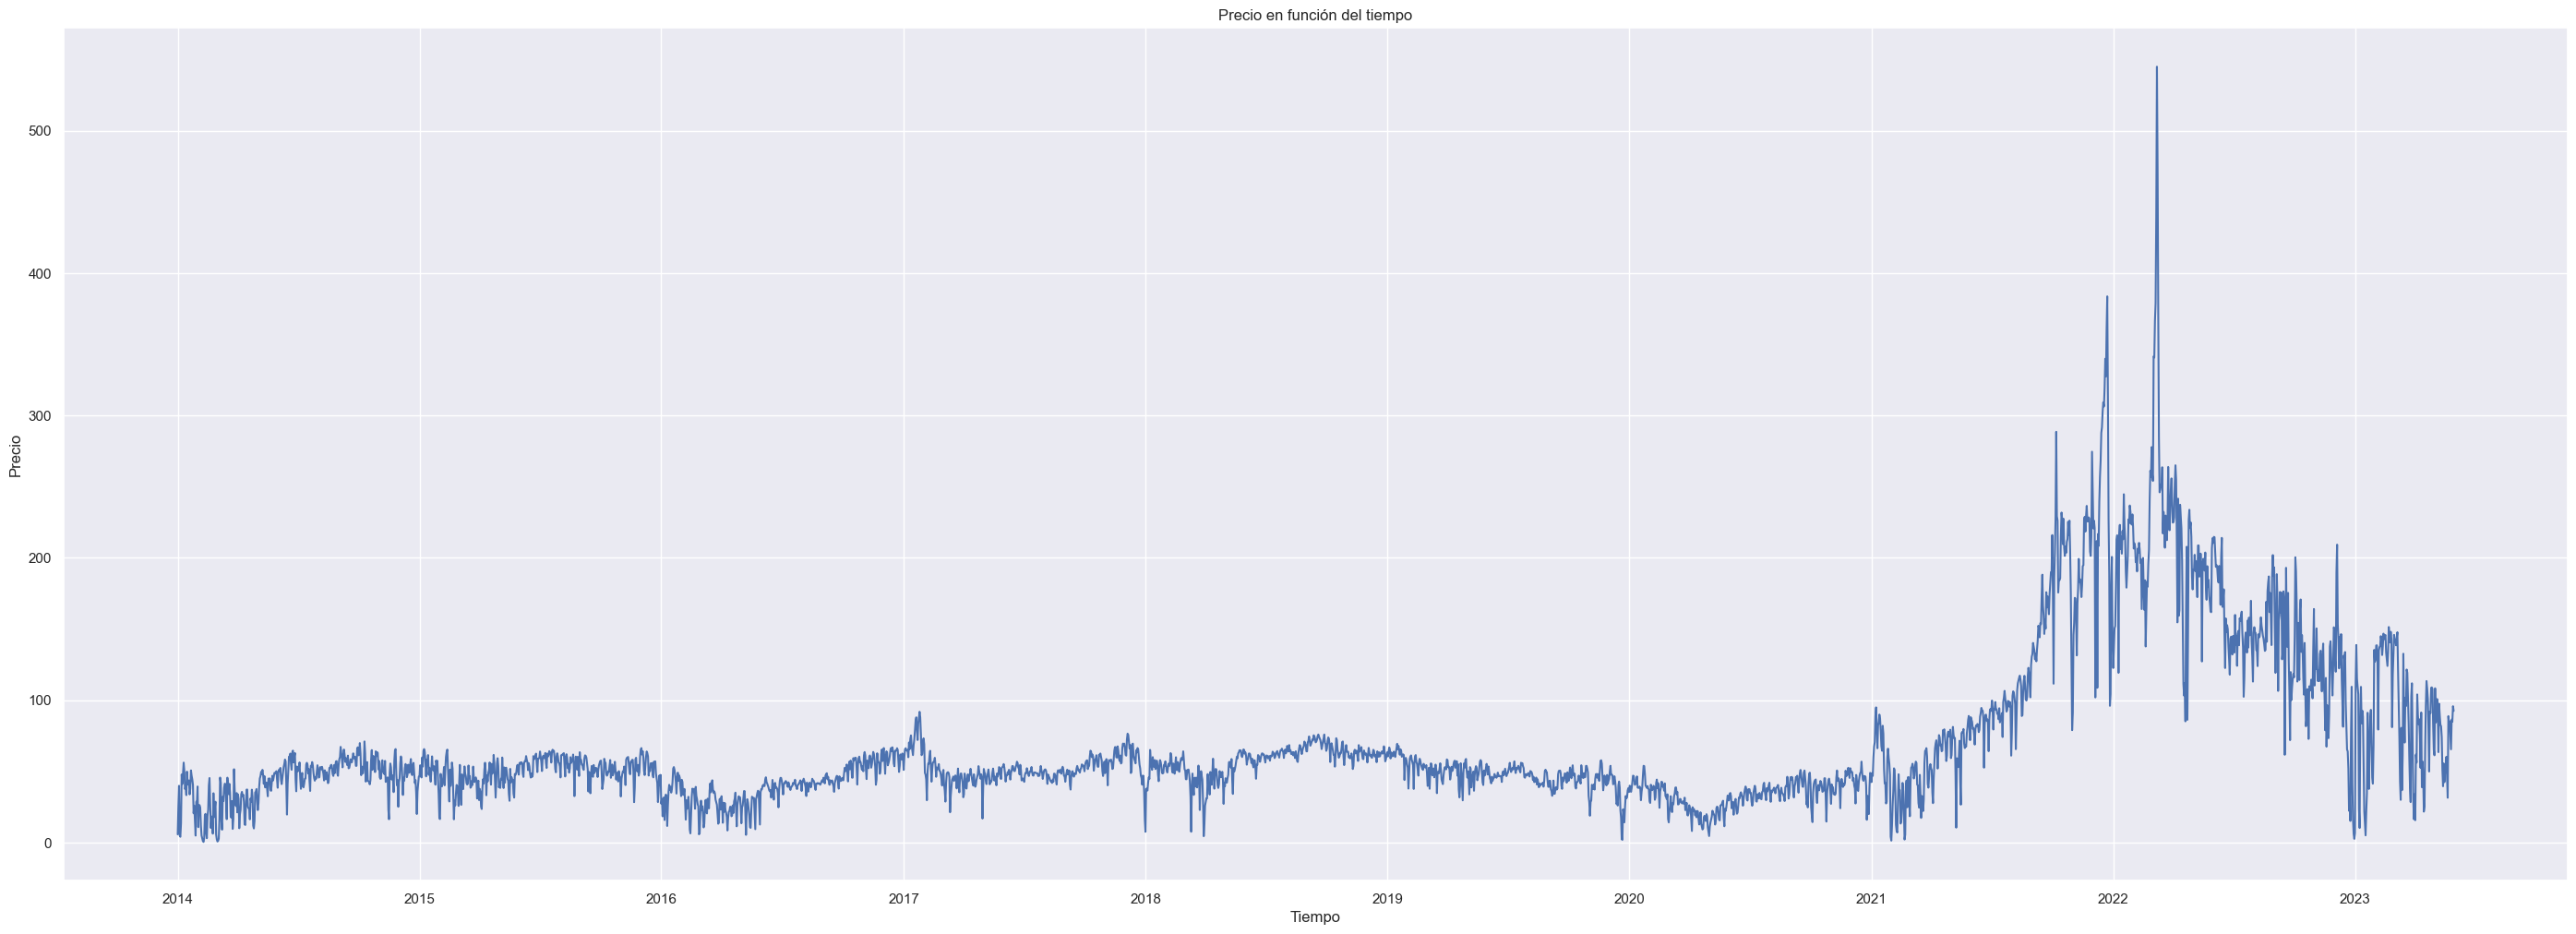

In [ ]:
sns.lineplot(x=df['datetime'], y=df['value'])

plt.title('Precio en función del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Precio')

plt.show()

### Precio medio de la electricidad por año para cada mes

No sé qué he hecho con el df pivot :( 

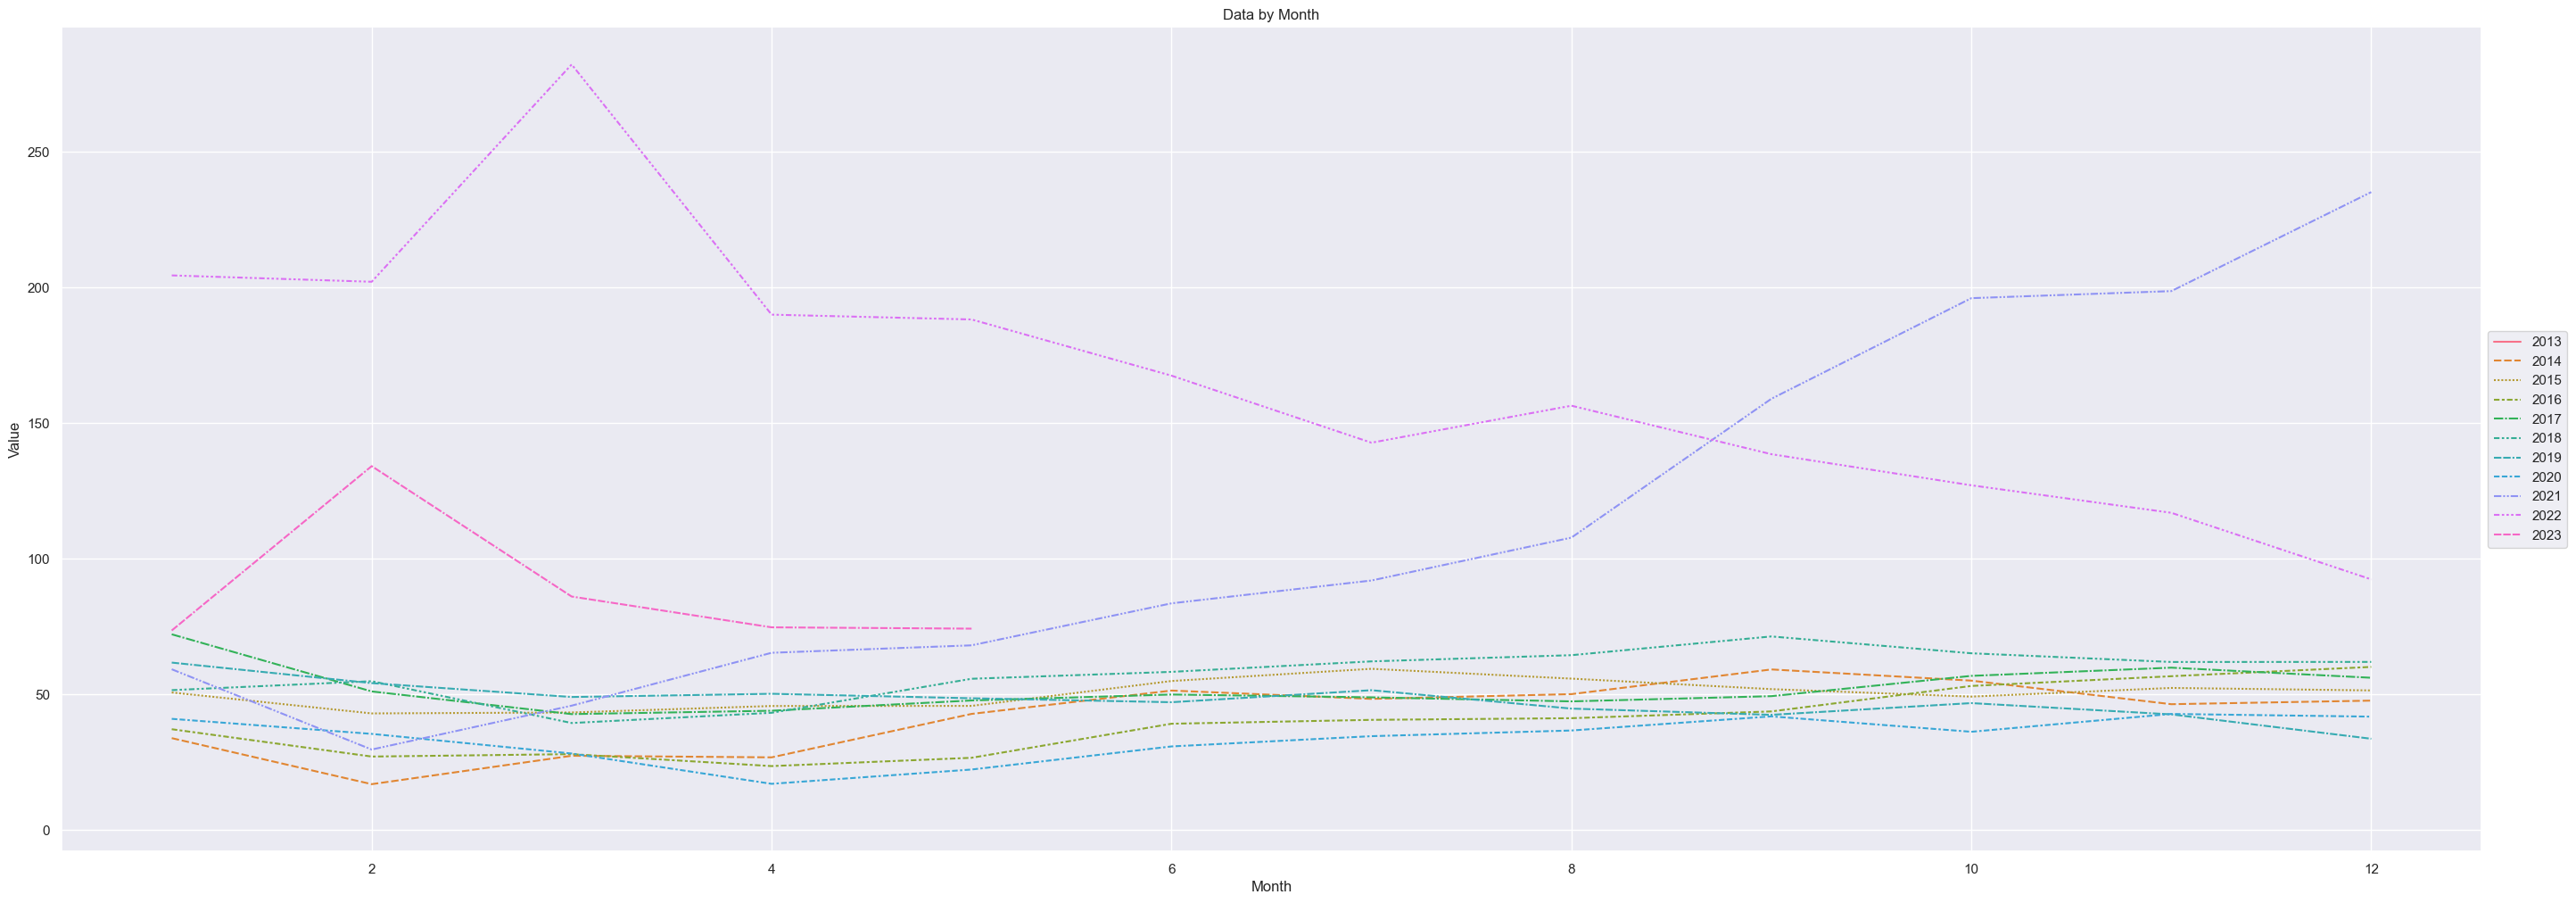

In [ ]:
ax = sns.lineplot(data=df_pivot)

plt.title('Data by Month')
plt.xlabel('Month')
plt.ylabel('Value')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Petroleo Brent

In [ ]:
brent = pd.read_csv('data_materias/brent.csv')

In [ ]:
brent.head()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,30.05.2023,"73,71","77,04","77,59","73,32","461,39K","-4,36%"
1,29.05.2023,"77,07","77,39","77,75","76,15","31,55K","0,16%"
2,26.05.2023,"76,95","76,09","77,35","75,73","150,62K","0,90%"
3,25.05.2023,"76,26","78,22","78,50","75,10","237,72K","-2,68%"
4,24.05.2023,"78,36","77,70","78,66","77,03","285,99K","1,98%"


In [ ]:
brent['Fecha'] = pd.to_datetime(brent['Fecha'], format='%d.%m.%Y')

In [ ]:
for c in columnas_transf:
    brent = punto(brent,c)

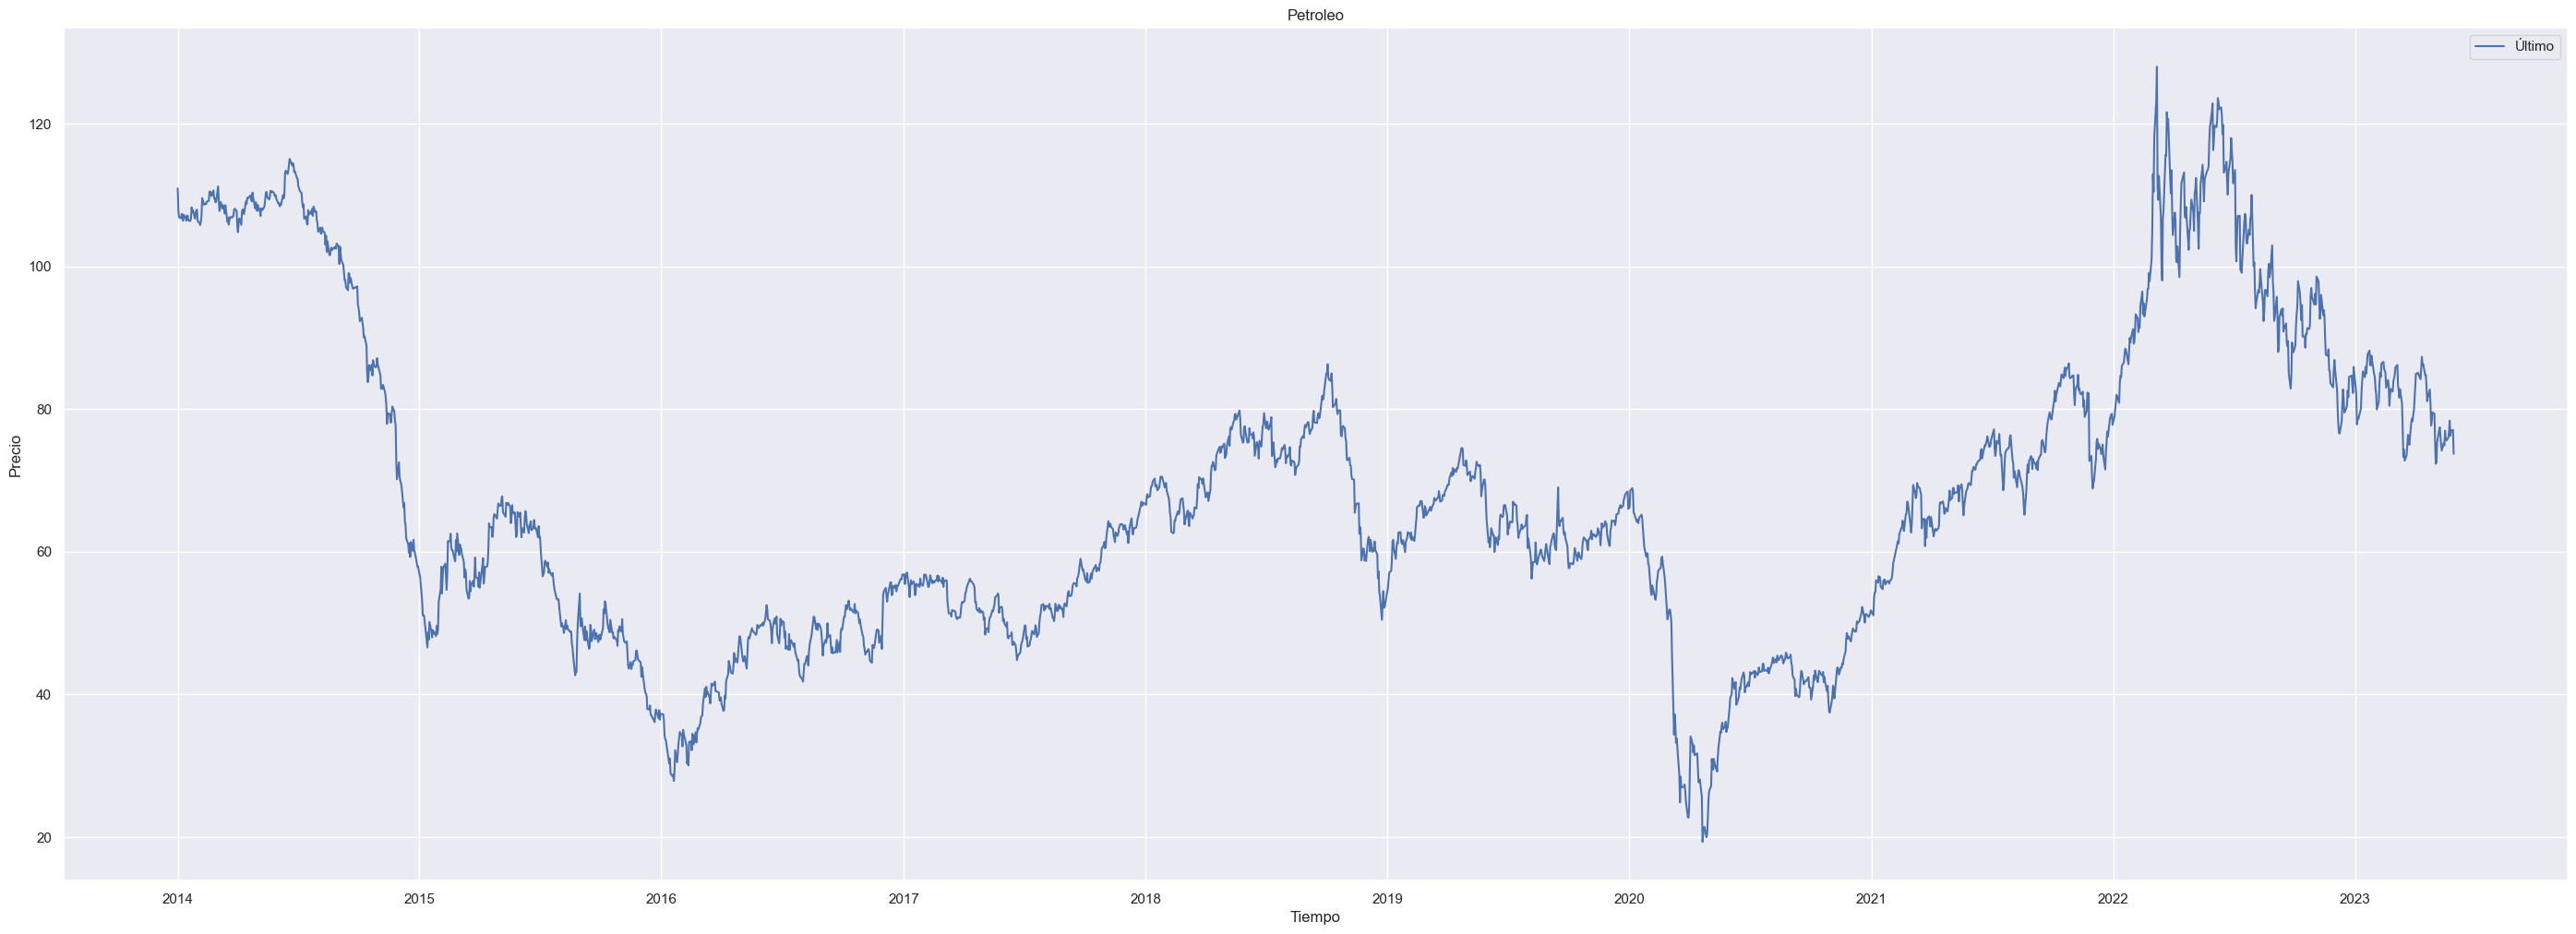

In [ ]:
sns.lineplot(x=brent.Fecha,y=brent['Último'], data=brent['Último'])

# Personalizar el gráfico
plt.title('Petroleo')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend(['Último'])

# Mostrar el gráfico
plt.show()

### Precio de las emisiones de CO2

In [ ]:
emisiones = pd.read_csv('data_materias/emisiones_co2.csv')

In [ ]:
emisiones.head(
    
)

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,30.05.2023,"80,38","83,05","83,34","80,36","24,55K","-3,16%"
1,29.05.2023,"83,00","83,01","84,46","82,67","4,74K","-0,16%"
2,26.05.2023,"83,13","82,75","83,37","81,94","14,76K","0,61%"
3,25.05.2023,"82,63","85,03","85,15","82,63","20,74K","-2,55%"
4,24.05.2023,"84,79","85,81","86,26","84,55","13,80K","-1,18%"


In [ ]:
emisiones.describe().T

,count,unique,top,freq
Fecha,2428,2428,30.05.2023,1
Último,2428,1574,"5,54",9
Apertura,2428,1563,"5,74",8
Máximo,2428,1555,"5,22",8
Mínimo,2428,1559,"5,81",10
Vol.,2413,850,"0,01K",142
% var.,2428,947,"0,00%",47


In [ ]:
emisiones['Fecha'] = pd.to_datetime(emisiones['Fecha'], format='%d.%m.%Y')

In [ ]:
for c in columnas_transf:
    emisiones = punto(emisiones,c)

Gráfico precio de emisiones CO2

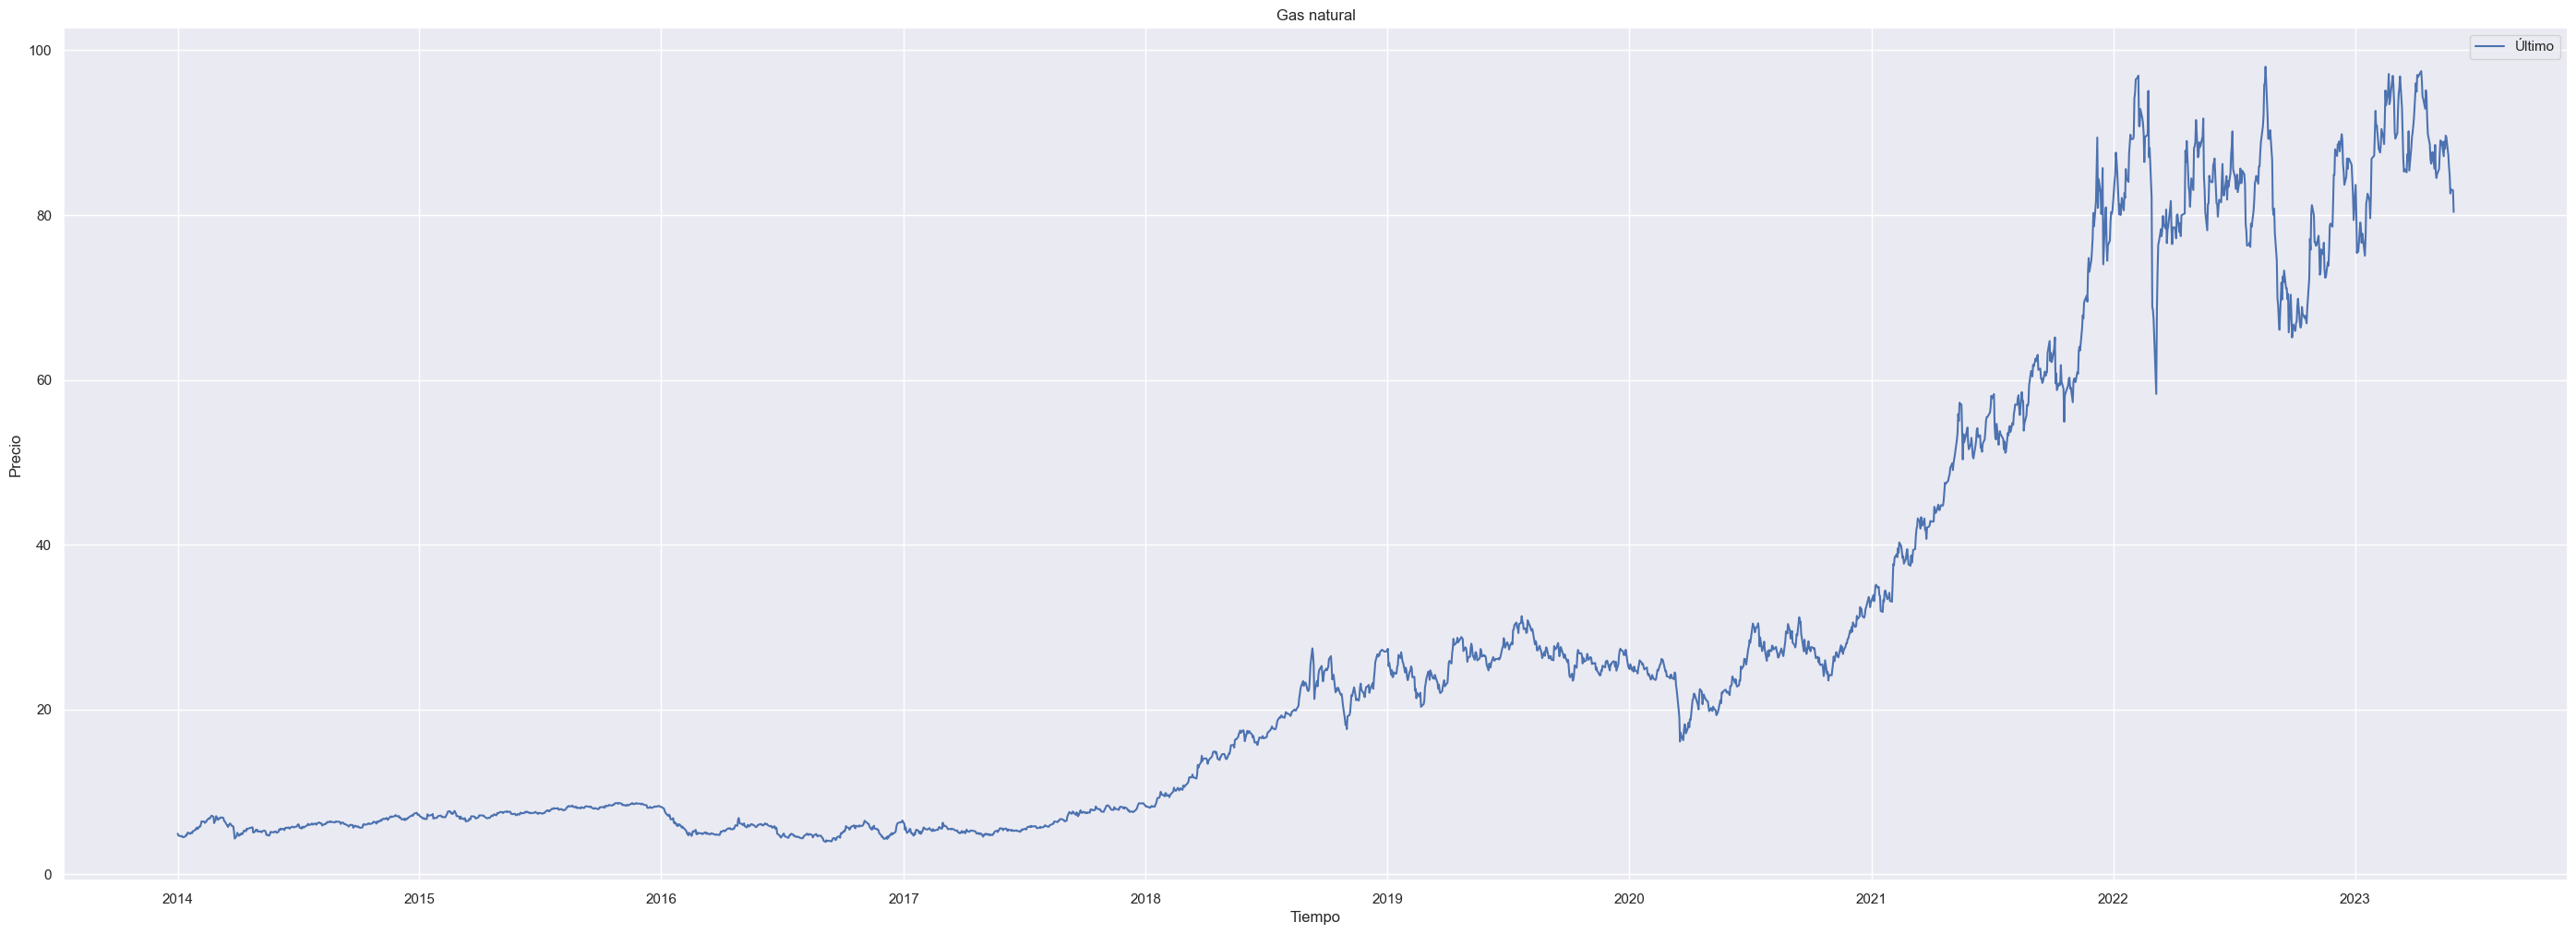

In [ ]:
sns.lineplot(x=emisiones.Fecha,y=emisiones['Último'], data=emisiones['Último'])

plt.title('Gas natural')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend(['Último'])

plt.show()

### Añadiendo factor COVID

Dejar esto para cuando ya se haya recolectado todos los datos!!

Confinamiento COVID --> 15 mar 2020 – 21 jun 2020

In [ ]:

#df['Confinamiento'] = df['date'].apply(lambda x: 1 if datetime.date(2020, 3, 15) <= x <= datetime.date(2020, 6, 21) else 0)

### Añadiendo días festivos

Lo voy a hacer en un jupyter a parte q es movidote